<a href="https://colab.research.google.com/github/NANDOPANDO/Vientos/blob/main/MarineData_Wind_Caribbean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![header](https://i.imgur.com/I4ake6d.jpg)


# COPERNICUS MARINE SERVICE : Marine Data 4 Sustainable Oceans

<div style="text-align: right"><i> </i></div>

***
<center><h1> Unlocking Offshore Wind Potential in the European North West Shelf </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***


# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Set up Python](#2.-Set-up-Python)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data](#3.-Data)
    - [3.1 Presentation of the product used](#3.1-Presentation-of-the-product-used)
    - [3.2 Accessing the data : the Copernicus ToolBox](#3.2-Accessing-the-data-:-the-Copernicus-ToolBox)
    - [3.3 Exploring the dataset](#3.3-Exploring-the-dataset)
- [4. Draw wind fields](#4.-Draw-wind-fields)
- [5. Computing wind energy potential](#5.-Computing-wind-energy-potential)
- [6. Creating a Virtual wind farm](#6.-Creating-a-Virtual-wind-farm)
- [7. Exercises](#7.-Exercises)
- [8. Conclusion](#8.-Conclusion)

1. Introducción
Volver al "Índice"

A medida que el mundo acelera su transición hacia las energías renovables, la energía eólica marina ha surgido como un componente clave en el mix energético global. Con vientos más fuertes y constantes que en tierra, los parques eólicos marinos ofrecen una solución prometedora para generar grandes cantidades de electricidad limpia. Sin embargo, aprovechar este potencial requiere un análisis cuidadoso de los recursos eólicos, las condiciones del sitio y las limitaciones operativas para garantizar su viabilidad y eficiencia.

Evaluar la viabilidad de un proyecto eólico marino va más allá de simplemente medir la velocidad del viento. Entran en juego varios factores críticos:

Estimaciones de producción energética basadas en la variabilidad del viento, la eficiencia de las turbinas y modelos de salida de potencia.

Limitaciones económicas y técnicas, incluyendo costos de instalación, integración a la red y mantenimiento a largo plazo en entornos marinos hostiles.

Consideraciones ambientales y regulatorias, como impactos en la biodiversidad marina, actividades pesqueras y tráfico marítimo.

Riesgos climáticos extremos, como tormentas y olas altas, que pueden afectar la infraestructura y la confiabilidad energética.

<img src="./img/offshore-wind-farm-aerial-high-angle.jpg" width="800"></center>
Vista aérea de un parque eólico marino. - Fuente: windeurope.org



In [1]:
!pip install cartopy
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime
import pandas as pd
import os

from scipy.stats import linregress, pearsonr
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.7 MB/s eta 0:00:00


# 3. Data

[Go back to the "Table of contents"](#Table-of-contents)

## 3.1 Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


----------------

We will retrieve the wind data from an observation product from the CMEMS catalogue : [Global Ocean Hourly Reprocessed Sea Surface Wind and Stress from Scatterometer and Model](https://data.marine.copernicus.eu/product/WIND_GLO_PHY_L4_MY_012_006/description).

This product offers hourly Level-4 sea surface wind and stress fields at 0.125° and 0.25° spatial resolution. It integrates scatterometer observations with corresponding variables from the ECMWF ERA5 reanalysis model to compute temporally averaged difference fields, which are then used to correct systematic biases in the hourly ERA5 model outputs.

The table below summarizes the main characteristics of the dataset :

| Parameter | Value |
| :---: | :---|
| **Variables used** | northward_wind, eastward_wind, air_density |
| **Product identifier** |[WIND_GLO_PHY_L4_MY_012_006](https://data.marine.copernicus.eu/product/WIND_GLO_PHY_L4_MY_012_006/description) |
| **Spatial resolution** | 0.125° × 0.125° |
| **Temporal resolution** | Hourly |
| **Temporal coverage** | 1 Jun 1994 to 21 Nov 2024 |


<center><img src="./img/wind_data_thb.png" width="300"></center>


**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://documentation.marine.copernicus.eu/PUM/CMEMS-WIND-PUM-012-004-006.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://documentation.marine.copernicus.eu/QUID/CMEMS-WIND-QUID-012-004-006.pdf)



## 3.2 Accessing the data : the Copernicus ToolBox

[Go back to the "Table of contents"](#Table-of-contents)


The [Copernicus Marine Toolbox](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introductionis) a new free tool that allows users to explore product metadata information, subset datasets, and download original files from producers, all without quotas. The procedure of downloading Copernicus Marine products is explained in details [here](https://help.marine.copernicus.eu/en/collections/9054839-main-functionalities). The data needed for the training is entirely downloadable using the following Python cells.

In this section, we will show you the downloading process of the Sea-Ice product by subsetting a specific region, variable, and period of time with the help of [subset](https://help.marine.copernicus.eu/en/articles/8283072-copernicus-marine-toolbox-api-subset) function of the Toolbox.

First, we import the Toolbox. Make sure to have activated the pre-installed CMEMS Python Kernel v4, which contains the Toolbox library. You can select it by clicking at the top right hand corner of this window.

<center><img src="./img/py_kernel.png" width="300"></center>

In [2]:
#usuario: hhernandez1 password: Padre1941.
!pip install copernicusmarine
import copernicusmarine

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 7.3 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5031 sha256=efc68a718c582a7948c2cc92bcaea59bc80570b7f0be6dad561407e9dac45517
  Stored in directory: /root/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree


In [3]:
# defining Area of Interest

lat_min = 8
lat_max = 13
lon_min =  -78
lon_max = -71

In [6]:
import os

# Crear la carpeta 'out' si no existe
os.makedirs('data', exist_ok=True)

# winds

copernicusmarine.subset(
dataset_id="cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H",
variables=[ "eastward_wind", "northward_wind", "air_density"],
minimum_longitude=lon_min,
maximum_longitude=lon_max,
minimum_latitude=lat_min,
maximum_latitude=lat_max,
start_datetime="2023-01-01T00:00:00",
end_datetime="2023-12-31T23:00:00",
output_directory = "data"
)


INFO - 2025-04-09T20:09:21Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: hhernandez1
Copernicus Marine password: ··········


INFO - 2025-04-09T20:09:43Z - Selected dataset version: "202211"
INFO:copernicusmarine:Selected dataset version: "202211"
INFO - 2025-04-09T20:09:43Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-04-09T20:10:02Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...


  0%|          | 0/1752 [00:00<?, ?it/s]

INFO - 2025-04-09T20:23:50Z - Successfully downloaded to data/cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_multi-vars_77.94W-71.06W_8.06N-12.94N_2023-01-01-2023-12-31_(1).nc
INFO:copernicusmarine:Successfully downloaded to data/cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_multi-vars_77.94W-71.06W_8.06N-12.94N_2023-01-01-2023-12-31_(1).nc


ResponseSubset(file_path=PosixPath('data/cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_multi-vars_77.94W-71.06W_8.06N-12.94N_2023-01-01-2023-12-31_(1).nc'), output_directory=PosixPath('data'), filename='cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_multi-vars_77.94W-71.06W_8.06N-12.94N_2023-01-01-2023-12-31_(1).nc', file_size=112.35498473282443, data_transfer_size=1904.8891603053435, variables=['eastward_wind', 'northward_wind', 'air_density'], coordinates_extent=[GeographicalExtent(minimum=-77.9375, maximum=-71.0625, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=8.0625, maximum=12.9375, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2023-01-01T00:00:00+00:00', maximum='2023-12-31T23:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

## 3.3 Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)


The file has been downloaded into the `data` repository. Let's now explore it !

In [9]:

ds_w = xr.open_dataset('data/cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_multi-vars_77.94W-71.06W_8.06N-12.94N_2023-01-01-2023-12-31.nc')
ds_w

<xarray.Dataset> Size: 471MB
Dimensions:         (time: 8760, latitude: 40, longitude: 56)
Coordinates:
  * latitude        (latitude) float32 160B 8.062 8.188 8.312 ... 12.81 12.94
  * longitude       (longitude) float32 224B -77.94 -77.81 ... -71.19 -71.06
  * time            (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:0...
Data variables:
    eastward_wind   (time, latitude, longitude) float64 157MB ...
    northward_wind  (time, latitude, longitude) float64 157MB ...
    air_density     (time, latitude, longitude) float64 157MB ...
Attributes:
    title:                      Global Ocean - Wind and Stress - Hourly - Rep...
    Conventions:               CF-1.6, ACDD-1.3
    history:                   N/A
    references:                Copernicus Marine Service Product User Manual ...
    institution:               Royal Netherlands Meteorological Institute (KNMI)
    copernicusmarine_version:  2.0.1

The wind data is decomposed into two components : the eastward and northward wind. Let's combine these two components to derive the total wind speed, and store it in a new variable in the dataset.
The wind speed will calculated using the following formula :

wind speed = $\sqrt{u²+v²}$ with u and v respectively the eastward and northward components of the wind.

In [10]:
ds_w['wind_speed'] = np.sqrt(ds_w.eastward_wind*ds_w.eastward_wind + ds_w.northward_wind*ds_w.northward_wind)
ds_w

<xarray.Dataset> Size: 628MB
Dimensions:         (time: 8760, latitude: 40, longitude: 56)
Coordinates:
  * latitude        (latitude) float32 160B 8.062 8.188 8.312 ... 12.81 12.94
  * longitude       (longitude) float32 224B -77.94 -77.81 ... -71.19 -71.06
  * time            (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:0...
Data variables:
    eastward_wind   (time, latitude, longitude) float64 157MB ...
    northward_wind  (time, latitude, longitude) float64 157MB ...
    air_density     (time, latitude, longitude) float64 157MB ...
    wind_speed      (time, latitude, longitude) float64 157MB 0.7829 ... 9.275
Attributes:
    title:                      Global Ocean - Wind and Stress - Hourly - Rep...
    Conventions:               CF-1.6, ACDD-1.3
    history:                   N/A
    references:                Copernicus Marine Service Product User Manual ...
    institution:               Royal Netherlands Meteorological Institute (KNMI)
    copernicusmarine_version:  2.0.1

# 4. Draw wind fields

[Go back to the "Table of contents"](#Table-of-contents)

The new *wind_speed* variable has been added to the dataset ! Let's now visualize the wind speed on a given date, displaying the speed and direction on a map. Wa are going to color the map according to the speed using the matplotlib **pcolor** function, and display the wind direction with arrows using the **quiver** function. As there is one arrow for each pixel of data, we will coarsen the dataset a little when calculating the wind field, to ensure the map is readable.

Text(0.5, 1.0, 'Wind Observations over North West European Shelf : 2023-09-25T21:00:00')

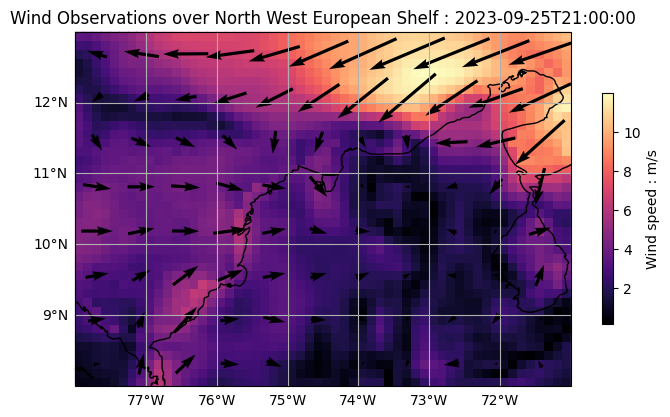

In [11]:
# draw a wind field

# coarsening the dataset to have bigger pixels and ease readibility.
ds_w_bis = ds_w.coarsen(latitude=5, longitude=5, boundary="trim").mean()

x = ds_w_bis.longitude.data
y = ds_w_bis.latitude.data

fig = plt.figure(figsize=(8,6))

ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines(color='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False

t_plot = "2023-09-25T21:00:00"
date_plot = ds_w.sel(time=t_plot, method="nearest")
date_plot_bis = ds_w_bis.sel(time=t_plot, method="nearest")


## drawing background map of windspeed
im = ax.pcolor(date_plot["longitude"], date_plot["latitude"], date_plot["wind_speed"], cmap="magma")
cbar = ax.figure.colorbar(im, ax=ax, label='Wind speed : m/s', shrink=0.5)

# drawing vector field
qv = ax.quiver(x, y, date_plot_bis["eastward_wind"], date_plot_bis["northward_wind"], pivot='mid', angles='xy')
# plt.quiverkey(qv, -70, 35, 2, 'wind speed', coordinates='data')

ax.set_title('Wind Observations over North West European Shelf : %s'%t_plot)


Let's animate this map, to see the evolution of the wind filed over a given period of time, like two entire days for instance!

In [13]:
import os

# Crear la carpeta 'out' si no existe
os.makedirs('out', exist_ok=True)

x = ds_w_bis.longitude.data
y = ds_w_bis.latitude.data

# starting time
tstart = np.datetime64('2023-09-25T00:00:00')

for c in range(48) :

    t_plot = tstart + np.timedelta64(c,'h')
    date_plot = ds_w.sel(time=t_plot, method="nearest")
    date_plot_bis = ds_w_bis.sel(time=t_plot, method="nearest")

    fig = plt.figure(figsize=(8,6))

    ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
    ax.coastlines(color='k')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
    gl.right_labels = False                                                            # remove latitude labels on the right
    gl.top_labels = False

    ## drawing background map of windspeed
    im = ax.pcolor(date_plot["longitude"], date_plot["latitude"], date_plot["wind_speed"], cmap="magma", vmin=0, vmax=18)
    cbar = ax.figure.colorbar(im, ax=ax, label='Wind speed : m/s', shrink=0.5)

    # drawing vector field
    qv = ax.quiver(x, y, date_plot_bis["eastward_wind"], date_plot_bis["northward_wind"], pivot='mid', angles='xy')
    # plt.quiverkey(qv, -70, 35, 2, 'wind speed', coordinates='data')

    ax.set_title('Wind Observations over North West European Shelf : %s'%t_plot)

    plt.tight_layout()
    t_plot_str = str(t_plot).replace(':', '')
    plt.savefig('out/wind_field_%s.png' % t_plot_str)
    plt.close()


In [14]:
# Import the modules for the animation
from PIL import Image
from pathlib import Path
from IPython.display import display, HTML

In [15]:
# Search image files
image_path = Path('out/')
images = sorted(image_path.glob('wind_field_*.png'))

# Load the images
images_files = [Image.open(file) for file in images]

# Save as a GIF
images_files[0].save(
    'out/animated_wind_field.gif',
    save_all=True,
    append_images=images_files[1:],
    duration=200,  # Duration between frames in milliseconds
    loop=10
)

In [17]:
# Visualisation
display(HTML('<img src="out/animated_wind_field.gif" width="800"/>'))

We can clearly a patch of strongs winds going over the western shelf over these two days, in a movement consistent with the direction displayed by the arrows!

# 5. Computing wind energy potential

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will estimate the exploitable power by wind turbines, in this area. This power is generally estimated using the following formula :

$P_{wt} = C_p\frac{1}{2}\rho Av^{3}$

*  $\rho$ is the air density
*  $A$ is the surface area covered by the rotors of the turbine
*  $v$ is the wind speed
*  $C_p$ is a performance coefficient. It accounts for the fact that a wind turbine does not convert all of the wind power to electricity. It generally between 0.4 and 0.5.

We will estimate the available power using the dimension of a typical offshore wind turbine : 100 meters long blades and a performance coefficient of 0.45.

In [18]:
# computation of a new variable
Cp = 0.45
A = 100*100*np.pi

conv_power = 0.5*Cp*ds_w.air_density.data*A*(ds_w.wind_speed.data**3)
ds_w['conv_power'] = (('time', 'latitude', 'longitude'), conv_power)

Now we have a new variable in the dataset giving the estimated power converted to electricity ! Note that another strong approximation we made is that we estimated it using wind data at a **10-meter level**. In order to be more accurate, we should rather use **100-meter level wind data** (if available), which is the typical height at which off shore wind turbines operate.

Let's map the wind power potential by averaging the new power variable over an entire year, using the **mean** function from xarray.

In [19]:
# puissance moyenne sur l'année

ds_w_avg = ds_w.mean(dim='time')

Text(0.5, 1.0, 'Estimated available power over the Colombian Caribbean')

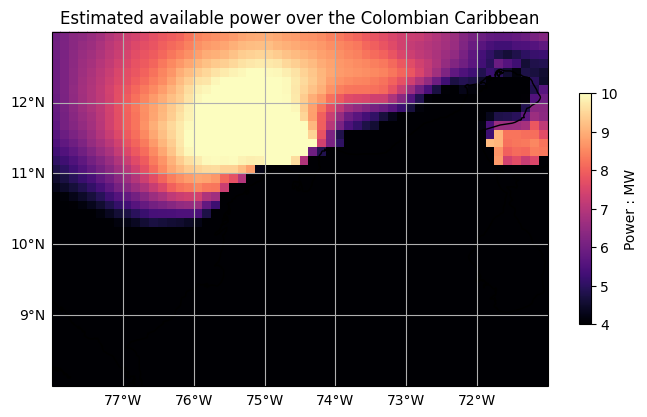

In [21]:
fig = plt.figure(figsize=(8,6))

ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines(color='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False

im = ax.pcolor(ds_w_avg["longitude"], ds_w_avg["latitude"], ds_w_avg["conv_power"]*(10**-6), cmap="magma", vmin=4, vmax=10)
cbar = ax.figure.colorbar(im, ax=ax, label='Power : MW', shrink=0.5)
ax.set_title('Estimated available power over the Colombian Caribbean')

The further we go from the coast, the higher the available power is. We can observe a strong potential around Ireland for instance. As of today, wind farms are located within only a few dozens kilometers from the coasts. Looking at a map of current and future offshore wind farms, it seems that a vast number of plans for new wind farms are focused on Ireland!

<center><img src="./img/wind_farms_locations.png" width="800"></center>

Explore the map on [EMODnet](https://emodnet.ec.europa.eu/en/map-week-locations-wind-farms-0).


# 6. Creating a Virtual wind farm

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will take a closer look at the computation of retrievable power from the wind. Since we have an hourly time series of wind speed, we can model the output power of a wind turbine in a more detailed way.

A wind turbine operates in different phases depending on wind strength, which can be categorized as follows:
*  below 3 m/s : the wind is to weak for the turbine to operate and generate power.
*  Between 3 m/s and 12 m/s: The generated power is proportional to the cube of the wind speed.
*  Between 12 m/s and 25 m/s: Nominal phase—the turbine produces its maximum (rated) power, which remains constant due to mechanical limitations.
*  Above 25 m/s: The turbine must be shut down for safety reasons.

Note that those values are typical wind speeds delimitating the phases of the turbine, but they of course vary depending on each model. For instance, some wind turbines can operate with a wind speed up to 30 m/s.

Let's use these constants to analyse the wind speed timeseries and calculate the real power output.

In [22]:
# computation of real power for a wind turbine of ~15 MW nominal power

def power_curve(v, P_max, v_min, v_nominal, v_max):
    if v < v_min or v > v_max:
        return 0  # Éolienne arrêtée
    elif v < v_nominal:
        return (v / v_nominal) ** 3 * P_max  # power increase
    else:
        return P_max  # Max power reached



def wind_farm(ds, lon, lat, model, nb_turbines):
    ds_point = ds.sel(longitude=lon, method='nearest').sel(latitude=lat, method='nearest')

    ds_point['power_output'] =  ('time', np.array([power_curve(v, model['P_max'], model['v_min'], model['v_nominal'], model['v_max']) for v in ds_point.wind_speed.data])*nb_turbines)
    ds_point['work_flag'] = ('time', np.where(ds_point.power_output.data > 0, 1, 0))
    ds_point['nominal_flag'] = ('time', np.where(ds_point.power_output.data == ds_point.power_output.data.max(), 1, 0))
    ds_point['partial_flag'] = ('time', np.where((ds_point.power_output.data < ds_point.power_output.data.max()) & (ds_point.power_output.data > 0), 1, 0))

    # energy timeseries

    return ds_point

In this cell, we define an hypothetical model for a wind turbine,using the wind threshold mentioned above, and a typical nominal power of **15 MW**.

Next, we create a virtual wind farm in a designated location, with a chosen number of wind turbines. The power output of the farm will displayed, as well as the total amount of energy generated over a year.

In this example, we will generate a virtual wind farm composed of 20 turbines of 15 MW, near the western coast of Ireland (lon= 10.79°W, lat = -75.49°N).

In [25]:
# data of our virtual wind farm

# inputs

model = {
    'v_min':3, 'v_nominal':12, 'v_max':25,   # typical thresholds in m/s
    'P_max':15  # nominal power in MW
}


lon = -75.49
lat = 10.79
nb_turbines = 20


###  Dataset for the wind farm

ds_point = wind_farm(ds_w, lon, lat, model, nb_turbines)

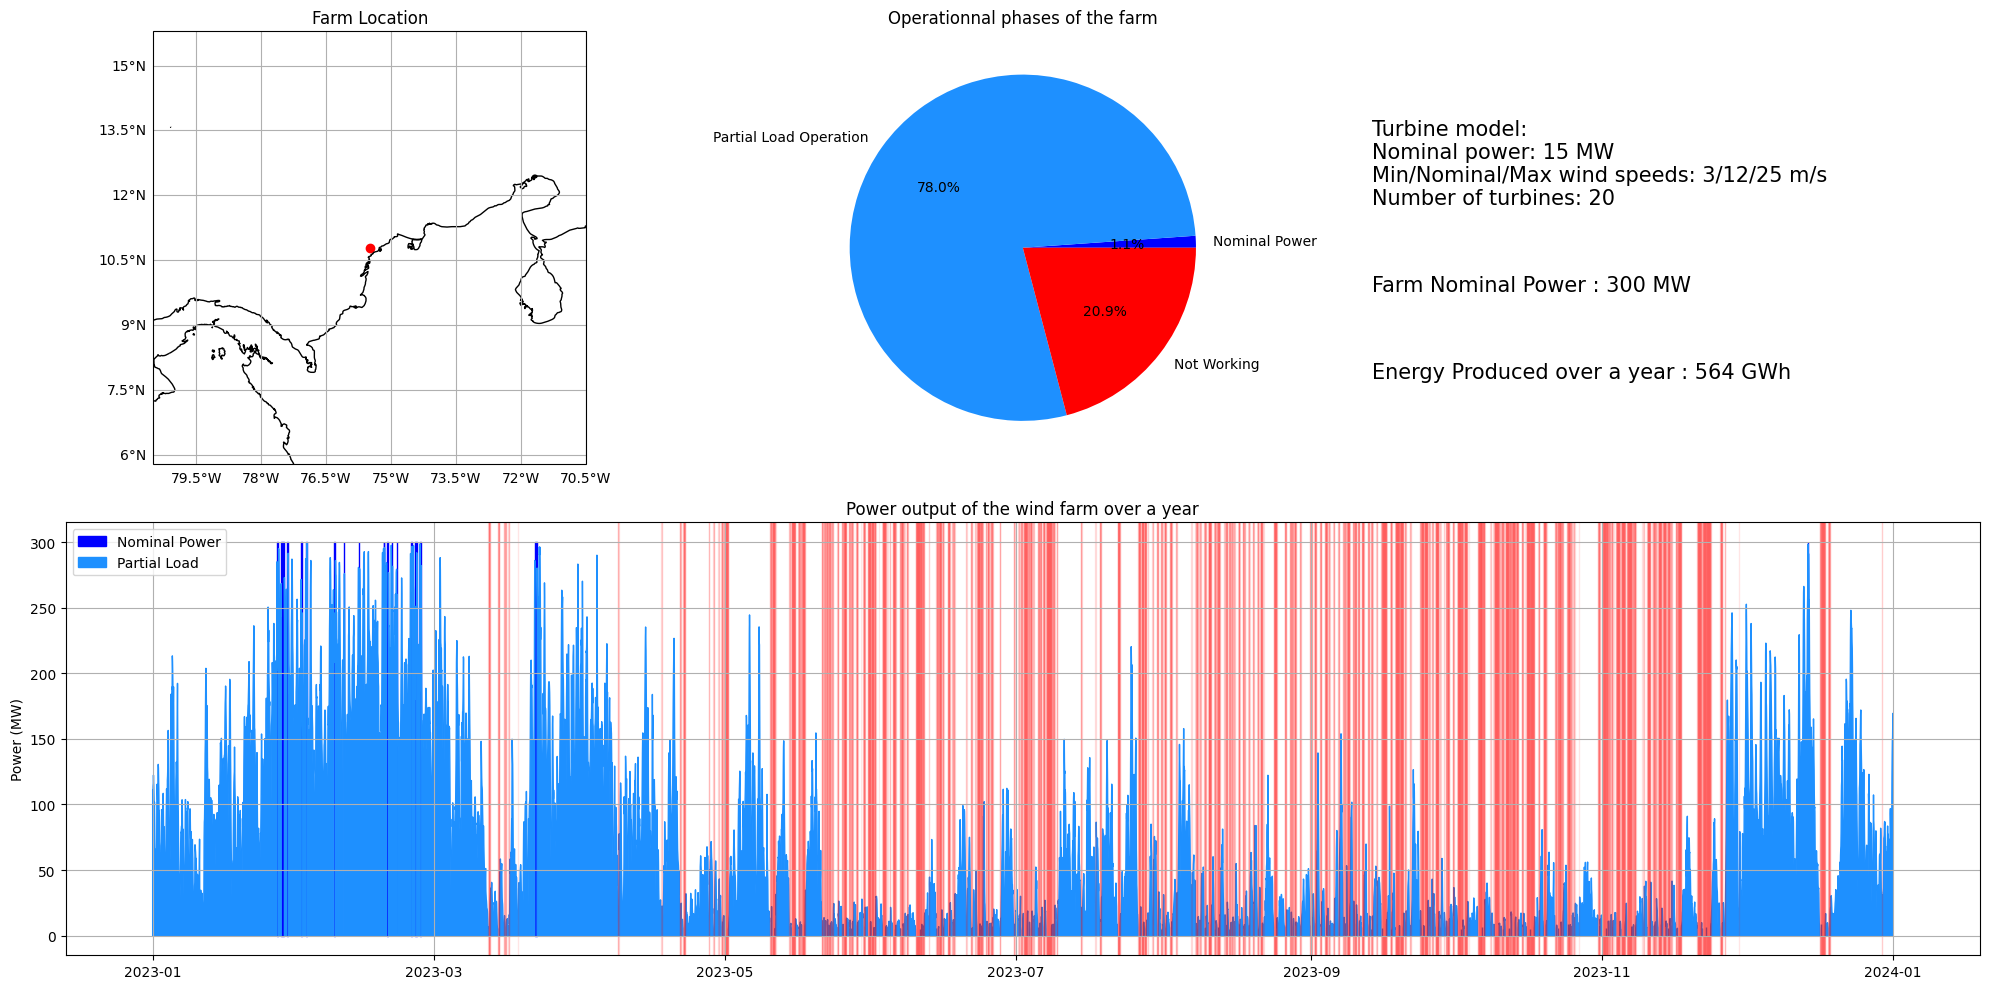

In [26]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(231, projection=ccrs.PlateCarree())
ax1.coastlines(color='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False

ax1.set_xlim(lon-5, lon+5)
ax1.set_ylim(lat-5, lat+5)

ax1.scatter([lon], [lat], c='r')
ax1.set_title('Farm Location')

# pie chart
ax2 = plt.subplot(232)

max_count = np.where(ds_point.power_output.data == ds_point.power_output.data.max(), 1, 0).sum()
incr_count = ds_point.work_flag.sum() - max_count
false_count = len(ds_point.work_flag.data) - ds_point.work_flag.sum()

ax2.pie([ds_point.nominal_flag.sum(), ds_point.partial_flag.sum(), len(ds_point.work_flag.data) - ds_point.work_flag.sum()],
        labels=['Nominal Power', 'Partial Load Operation', 'Not Working'],
        colors=['blue', 'dodgerblue', 'red'],
        autopct='%1.1f%%')

ax2.set_title("Operationnal phases of the farm")

axt = plt.subplot(233)

axt.text(0,0.6, 'Turbine model:\nNominal power: %d MW\nMin/Nominal/Max wind speeds: %d/%d/%d m/s\nNumber of turbines: %d' % (model['P_max'], model['v_min'], model['v_nominal'], model['v_max'], nb_turbines), fontsize=15)
axt.text(0,0.4, 'Farm Nominal Power : %d MW' % (model["P_max"]*nb_turbines), fontsize=15)
axt.text(0,0.2, 'Energy Produced over a year : %d GWh' % (ds_point.power_output.sum()*0.001), fontsize=15)
axt.set_axis_off()

ax3 = plt.subplot(212)

#ax3.plot(ds_point.time, ds_point.power_output, linewidth=0.5, color='dodgerblue')

max_out = np.where(ds_point.nominal_flag.data==True, ds_point.power_output.data, np.nan)
partial_out = np.where(ds_point.partial_flag.data==True, ds_point.power_output.data, np.nan)

ax3.fill_between(ds_point.time, max_out, interpolate=True, color='blue', label='Nominal Power')
ax3.fill_between(ds_point.time, partial_out, interpolate=True, color='dodgerblue', label='Partial Load')
for i in range(len(ds_point.time.data)):
    if not ds_point.work_flag.data[i]:
        ax3.axvspan(ds_point.time.data[i], ds_point.time.data[i+1], color='red', alpha = 0.1)

ax3.set_title('Power output of the wind farm over a year')
ax3.set_ylabel('Power (MW)')
ax3.grid(True)
ax3.legend()

plt.tight_layout()

In our example, we can see how much the power output of a wind farm can vary over time. In our exmaple, the is a long period, from April to July 2023, where the nominal phase is almost never reached. This variability highlights the intermittent nature of wind energy.

In our example, we can also see that the energy produced over a year is of approximately 1200 GWh, which is enough to power a medium European city (~ 240 000 households). To conclude, we can calculate the **capacity factor** of the wind farm. It simply the proportion of energy generated with regards to the theoretical maximal production.

$CF = \frac{E_{gen}}{E_{max}} = \frac{E_{gen}}{P_{max}x8760 h}$

In [28]:
CF = (ds_point.power_output.sum()*0.001)/((model["P_max"]*nb_turbines)*8760*0.001)

print("Capacity Factor : %.2f" % CF)

Capacity Factor : 0.21


Depending on the location and technology, the capacity factor of offshore wind farms is usually between 40% et 55%. The capacity factor of 46% that we calculated is therefore well within the expected range.

# 7. Exercises

[Go back to the "Table of contents"](#Table-of-contents)


<div class="alert alert-block alert-info">  

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions. If you need help, do not hesitate to contact the service desk: **[servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu)**!

**Beginners** :

- In [Section 4](#4.2-Drawing-your-first-map) we animated a wind field over two specific days. You can explore more by changing the starting date and/or expanding
    
- In [Section 6](#5.-Computing-Sea-Ice-extent-trends), we created a virtual wind farm with several specifications : turbine nominal power, number of turbines, locations... Try playing with the parameters to create other virtual wind farms!

**Intermediate** :

- The wind product we used provides data on a global level. You can try to change the area of interest of the retrieved dataset, and reproduce the analysis conducted in this notebook!

- We computed the production over a single year. You can investigate the evolution of wind power production over several years to examine its yearly variability !
    
</div>

# 8. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)


In this notebook, you learned to access CMEMS data through the Copernicus Marine Service ToolBox, and to explore it. You then learned to estimate the wind power potential of a given area, and finally you learned to perform a simple modelisation of a wind turbine and calculate its ouput over time.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>

And thank you for your attention! :)
    
    
We hope you enjoyed this Jupyter Notebook training on Sustainable Oceans.

You now have plenty of tools to analyse wind data and model wind turbines. Feel free to re-use and adapt all the Python scripts of this notebook to your needs !

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us at [servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu) !